<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/UAS_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option("display.max_columns", None)

df = pd.read_csv("KlasifikasiUTS.csv")

# Data Overview


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis


## Bivariate Analysis


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_distribution(column_name):
    """
    Create overlaid KDE plots for each class in a single figure
    Note: Using common_norm=False to better visualize distributions
    due to significant class imbalance in the dataset

    Parameters:
    column_name (str): Name of the column to plot
    """
    plt.figure(figsize=(10, 6))

    # Plot for Class 0
    class_0_data = df[df["Class"] == 0][column_name]
    sns.kdeplot(
        data=class_0_data,
        fill=True,
        alpha=0.4,
        color="blue",
        label="Class 0",
        common_norm=False,
    )

    # Plot for Class 1
    class_1_data = df[df["Class"] == 1][column_name]
    sns.kdeplot(
        data=class_1_data,
        fill=True,
        alpha=0.4,
        color="red",
        label="Class 1",
        common_norm=False,
    )

    plt.title(f"Distribution of {column_name} by Class", fontsize=14, fontweight="bold")
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add note about common_norm=False
    plt.figtext(
        0.5,
        0.0001,
        "Note: Using common_norm=False to better visualize distributions due to significant class imbalance",
        ha="center",
        fontsize=10,
        style="italic",
        color="gray",
    )

    plt.tight_layout()
    plt.show()

### Time


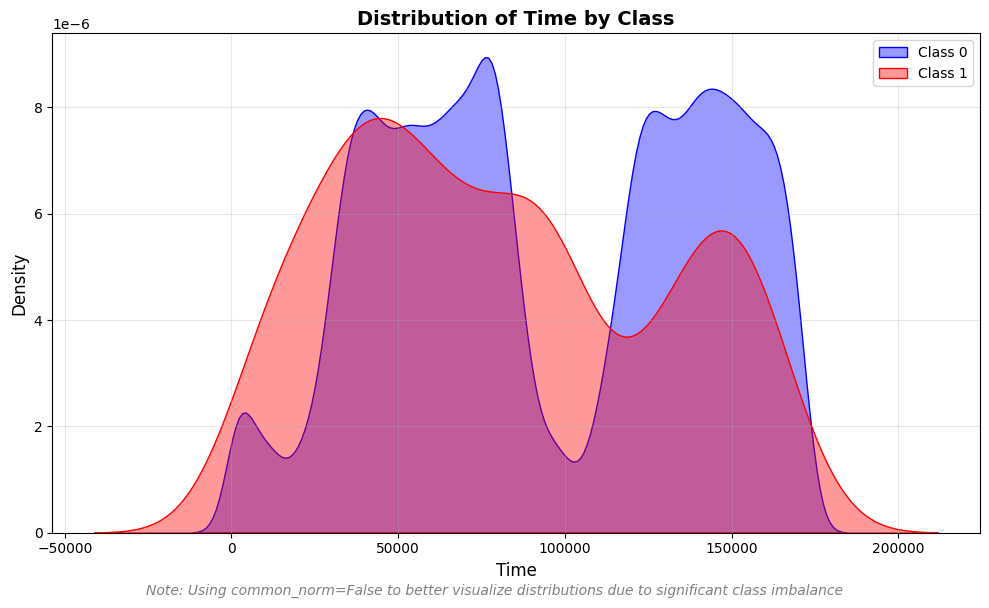

In [ ]:
plot_distribution("Time")

### V1 - V28


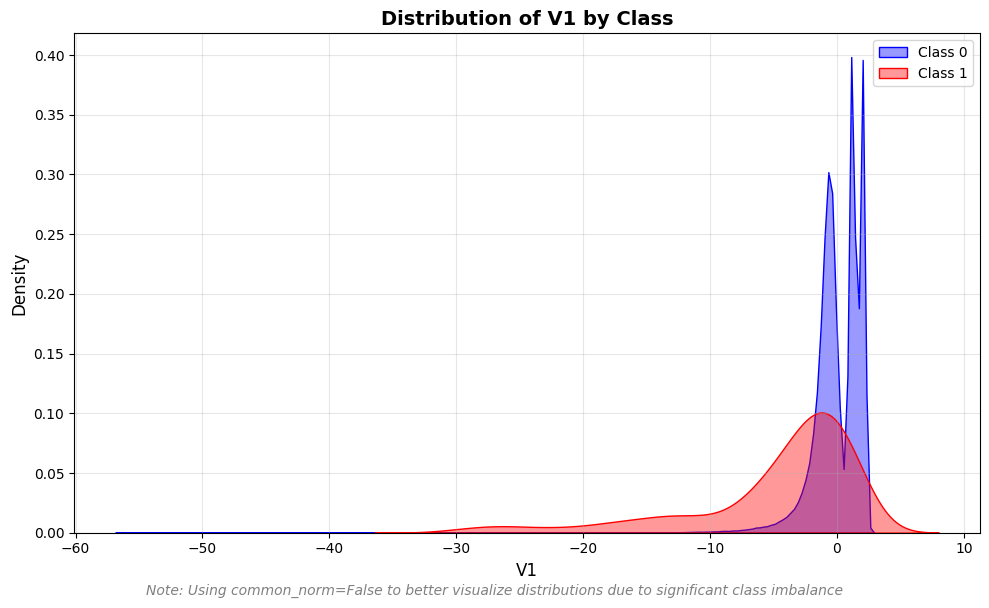

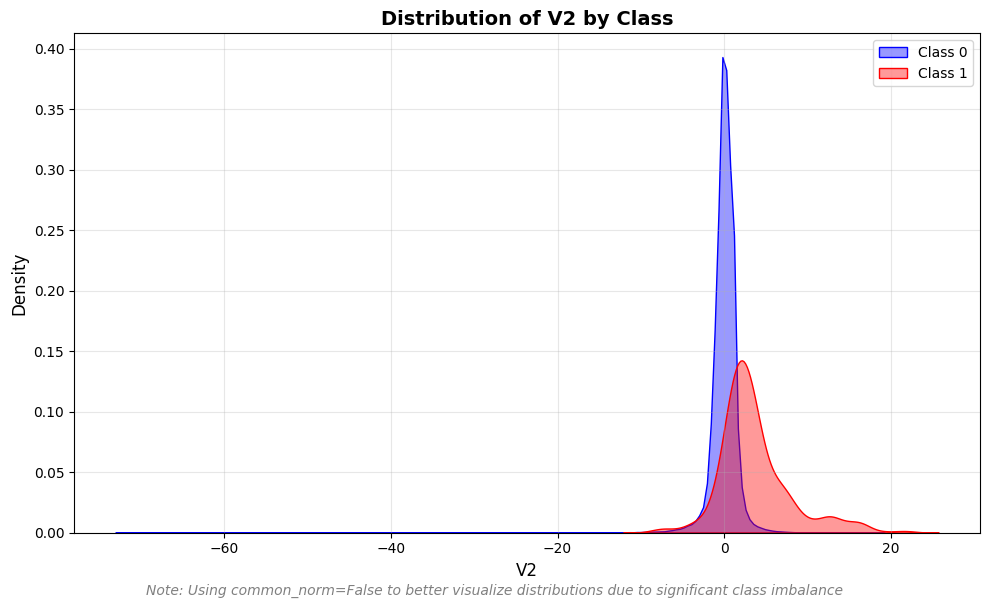

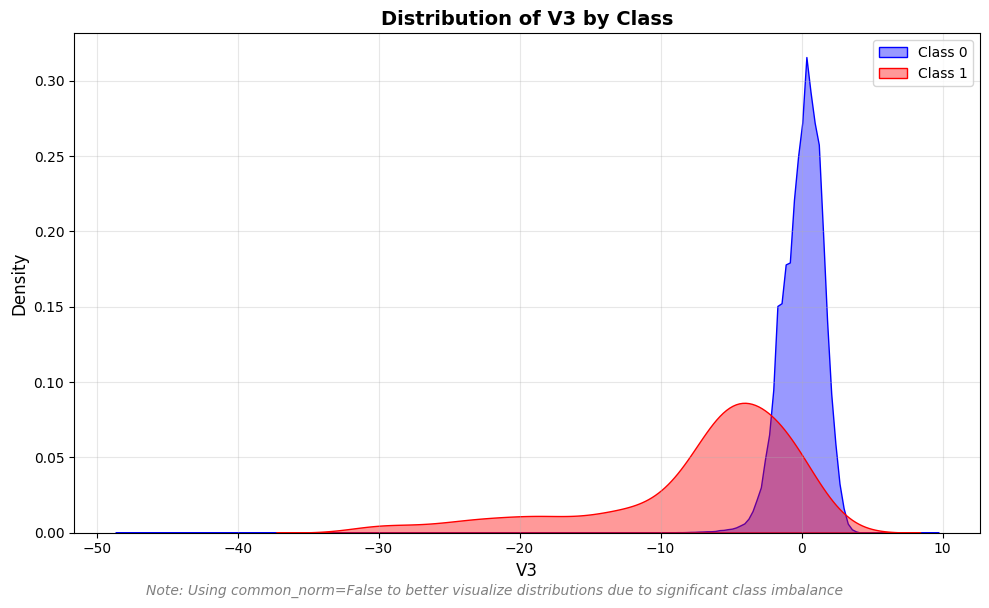

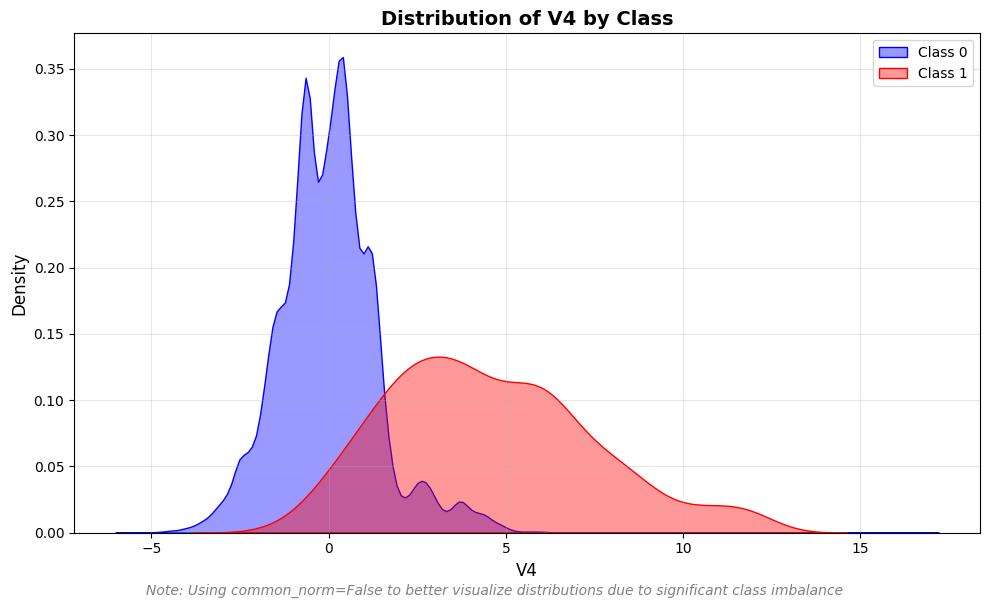

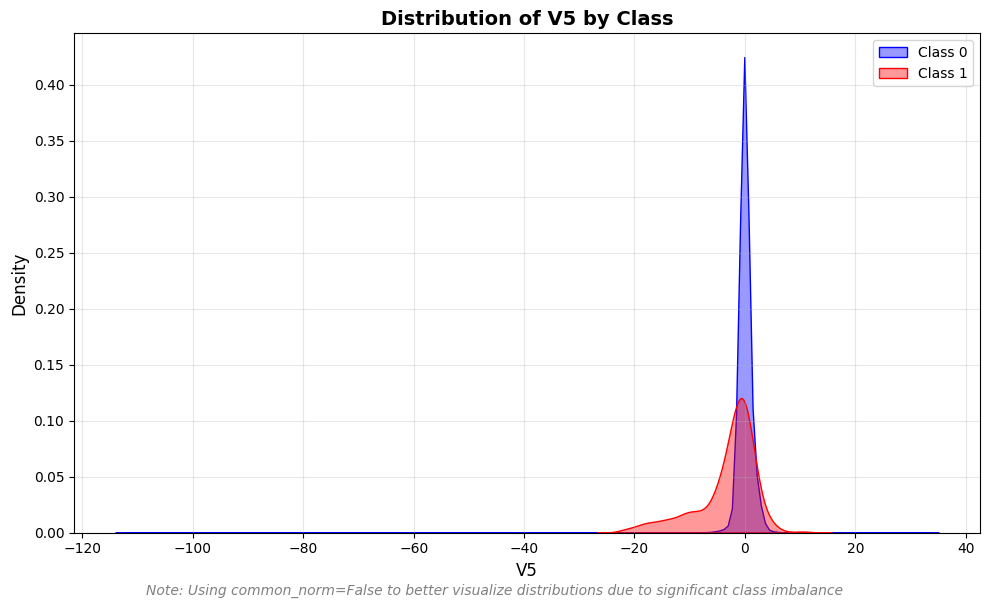

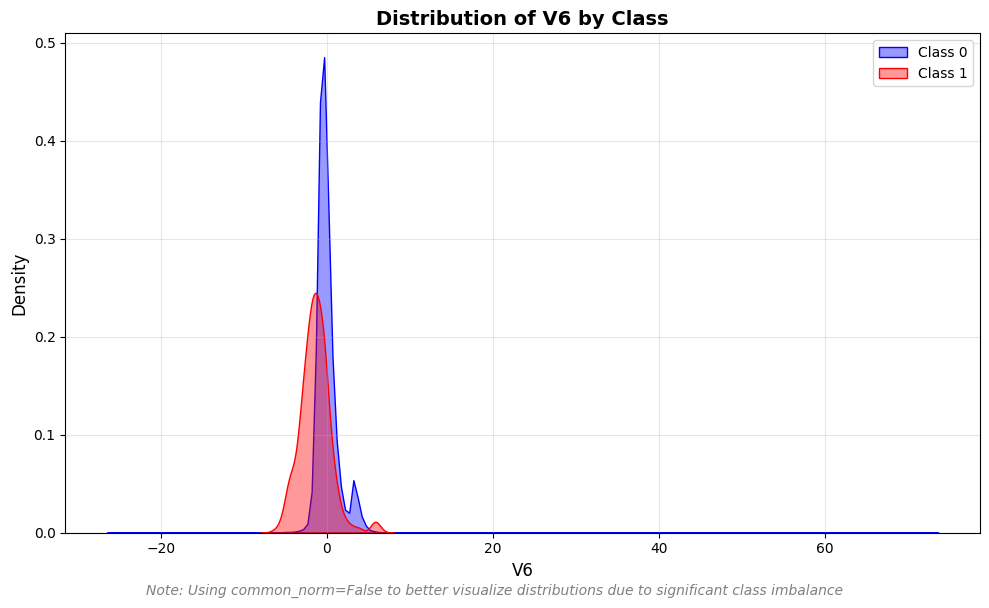

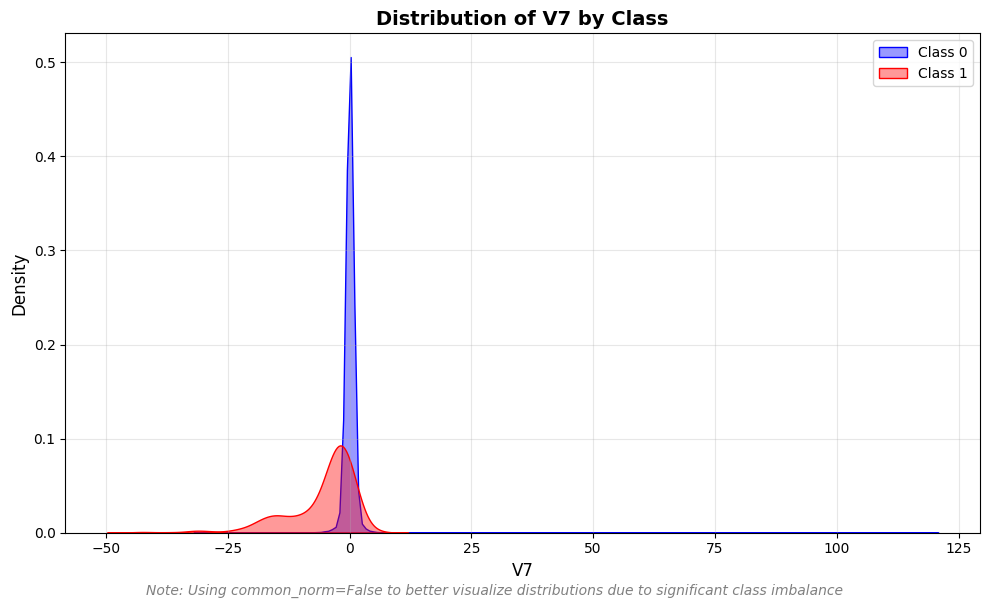

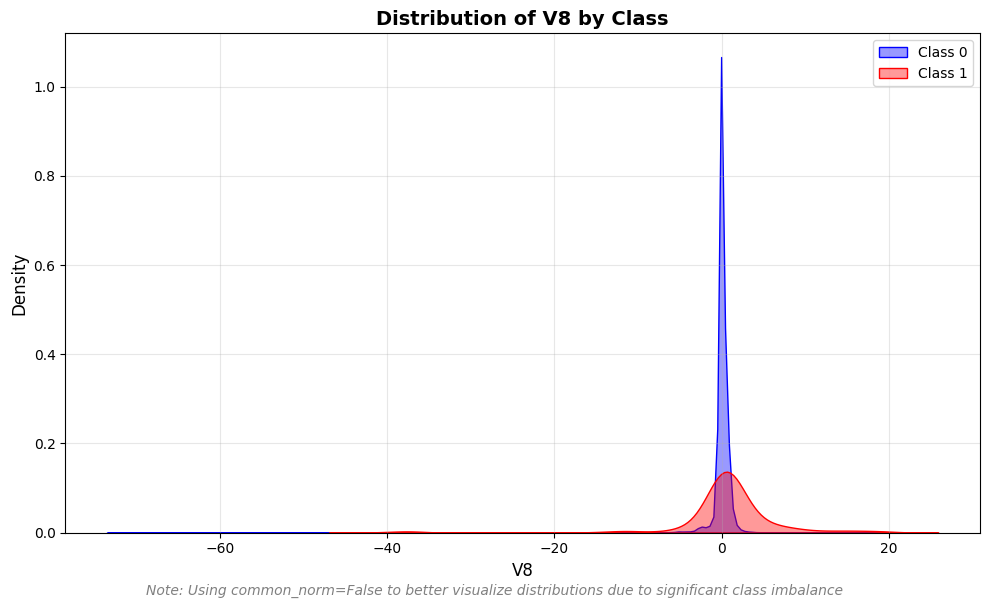

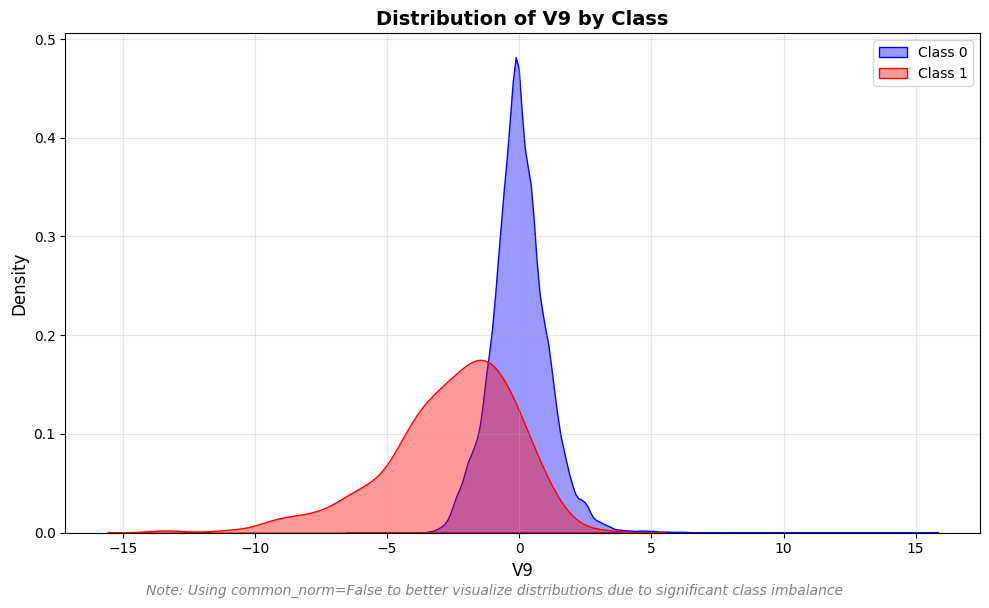

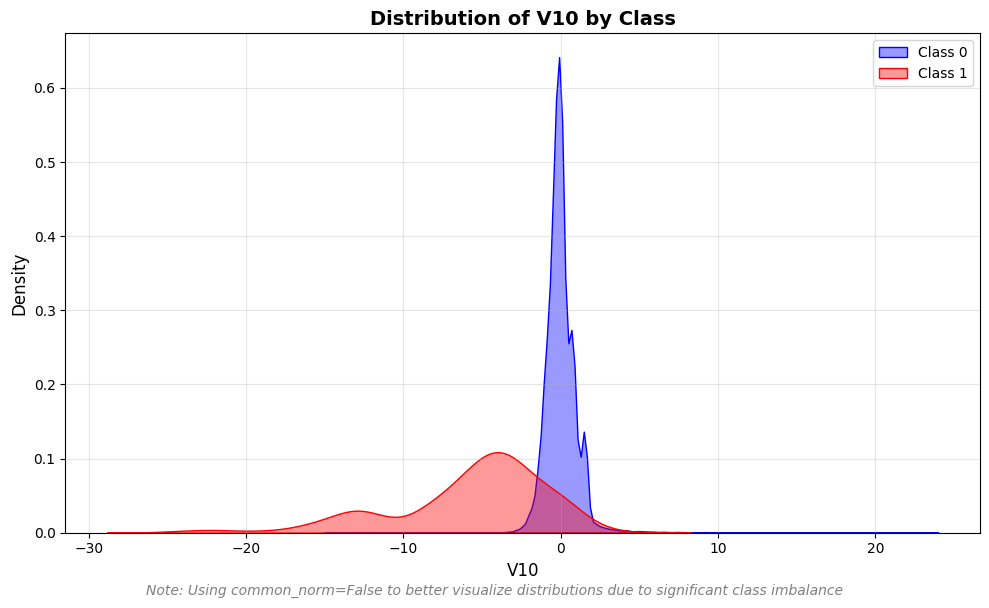

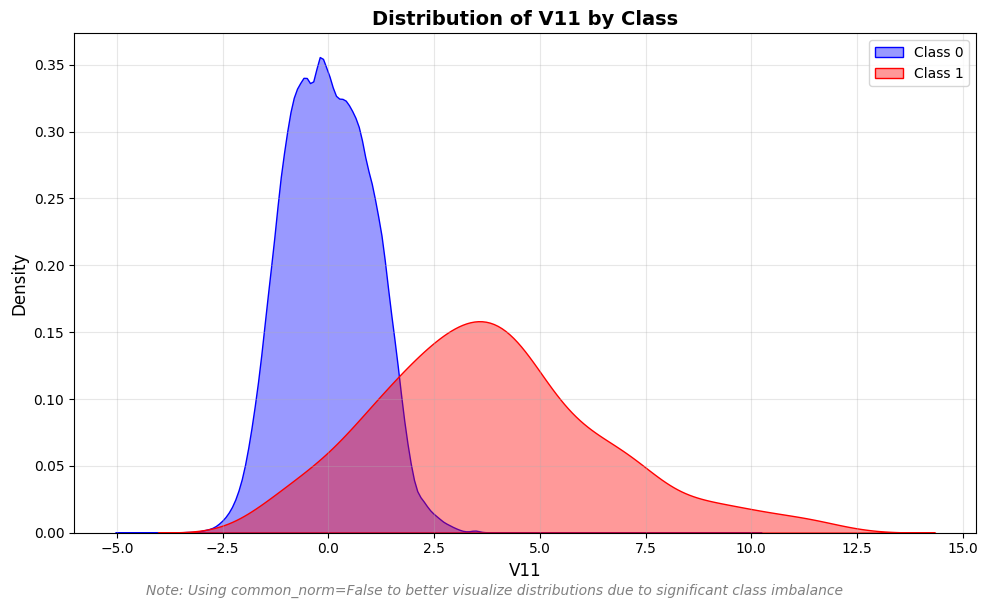

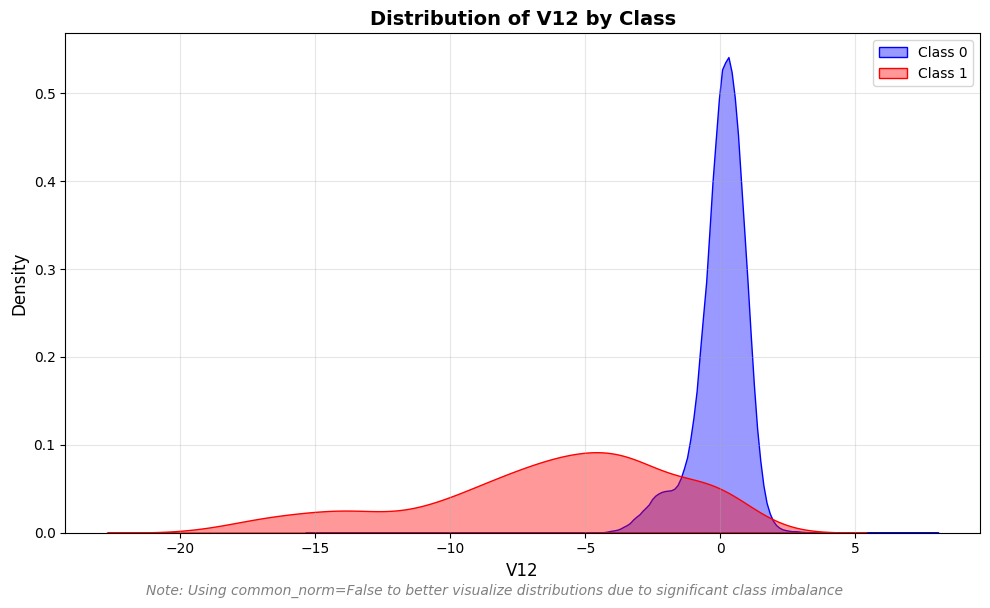

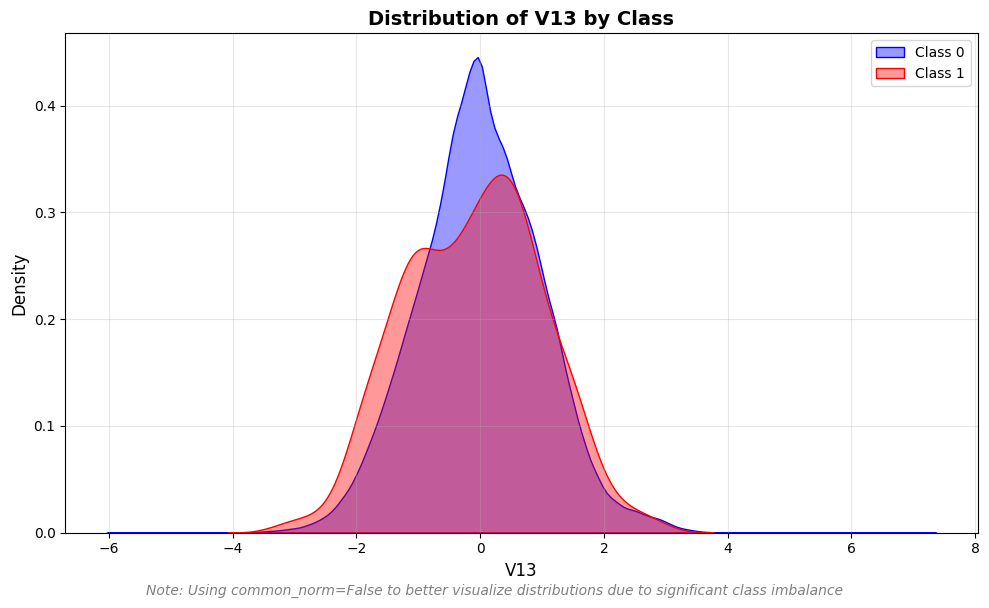

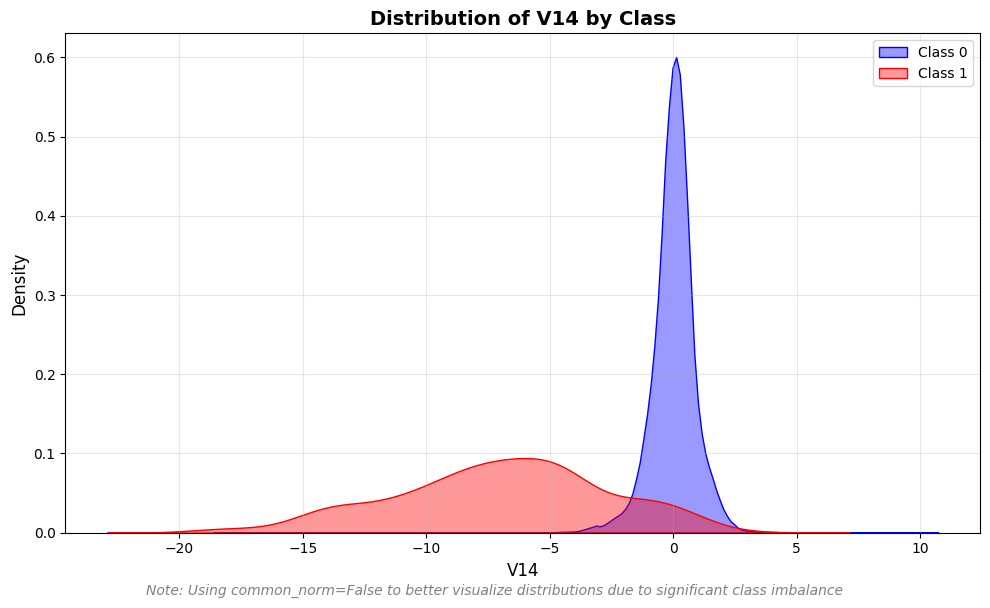

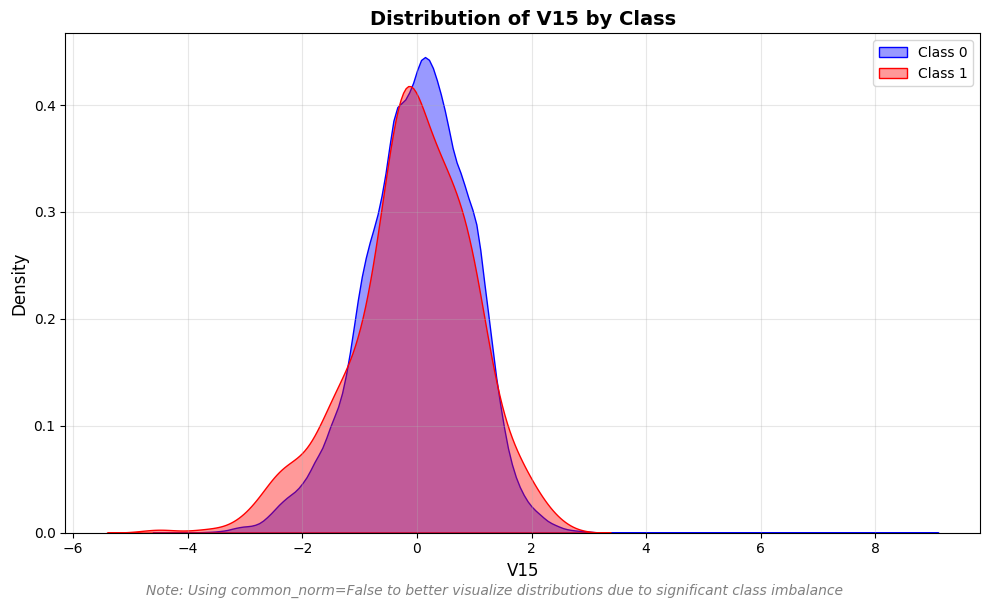

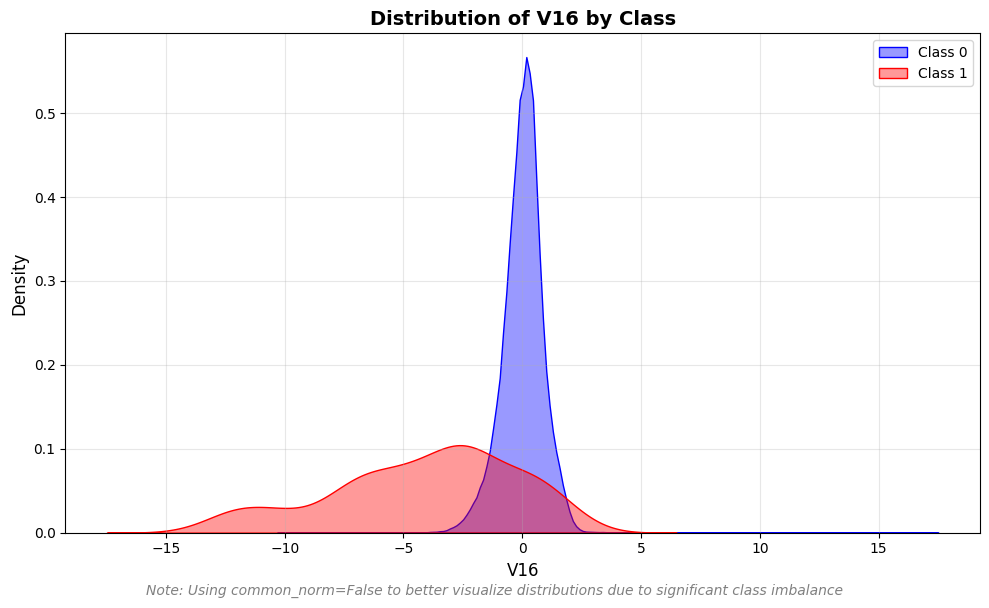

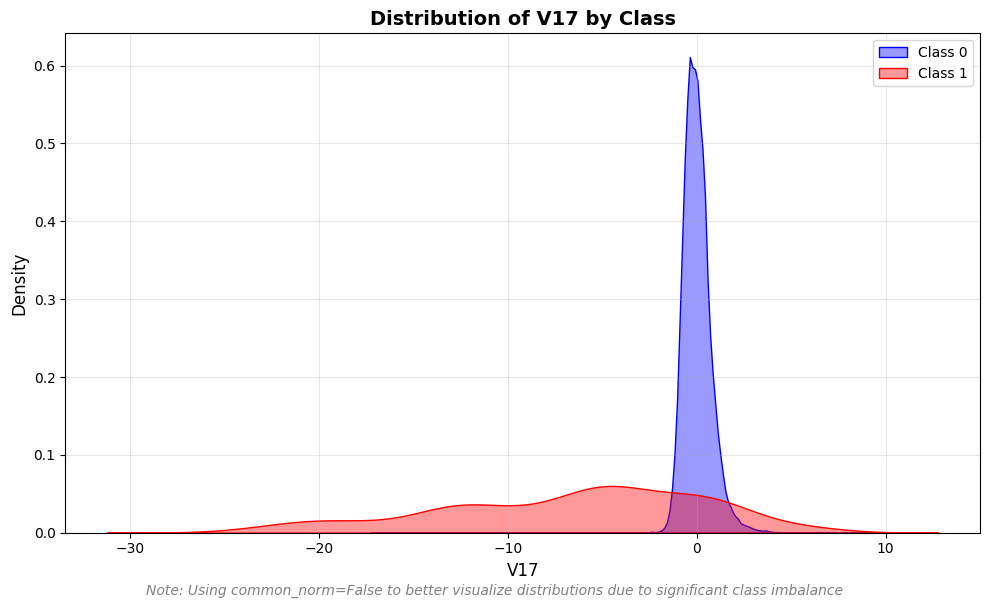

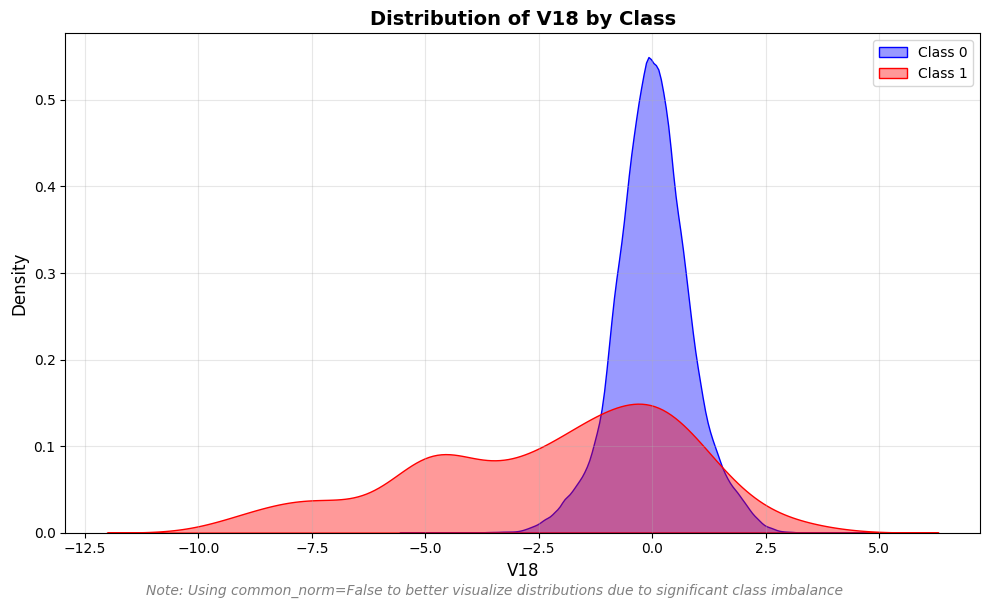

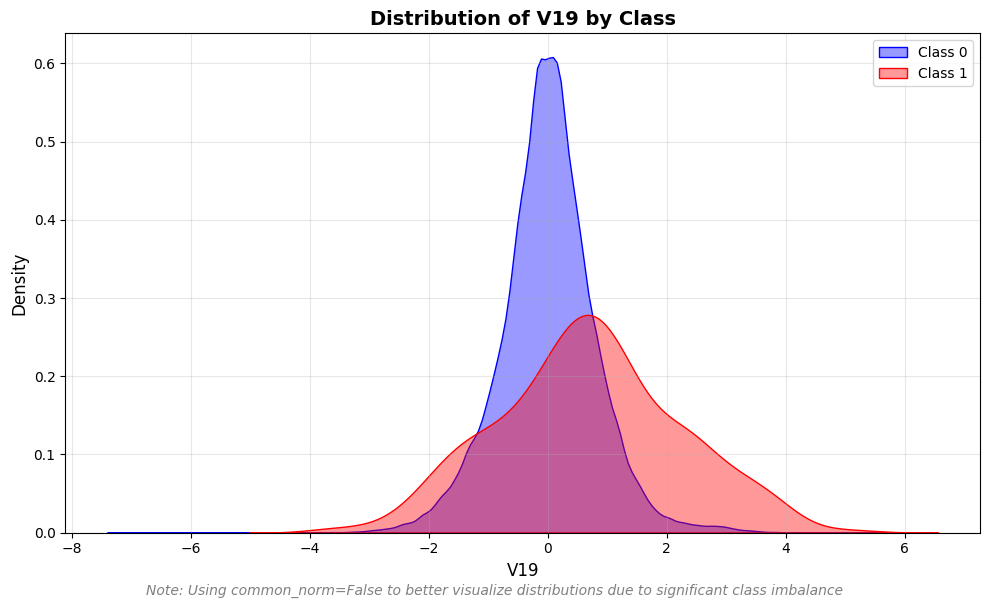

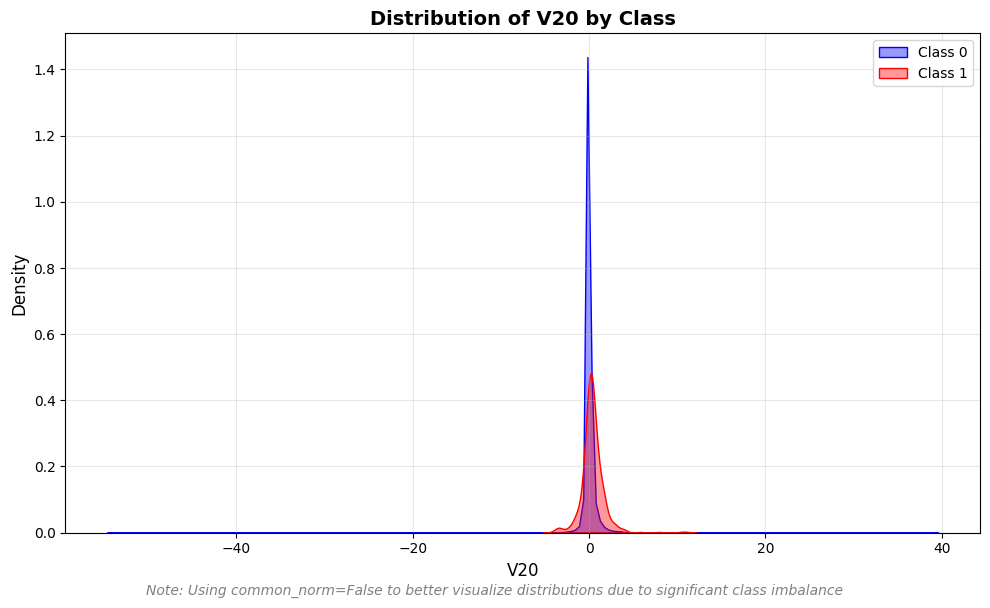

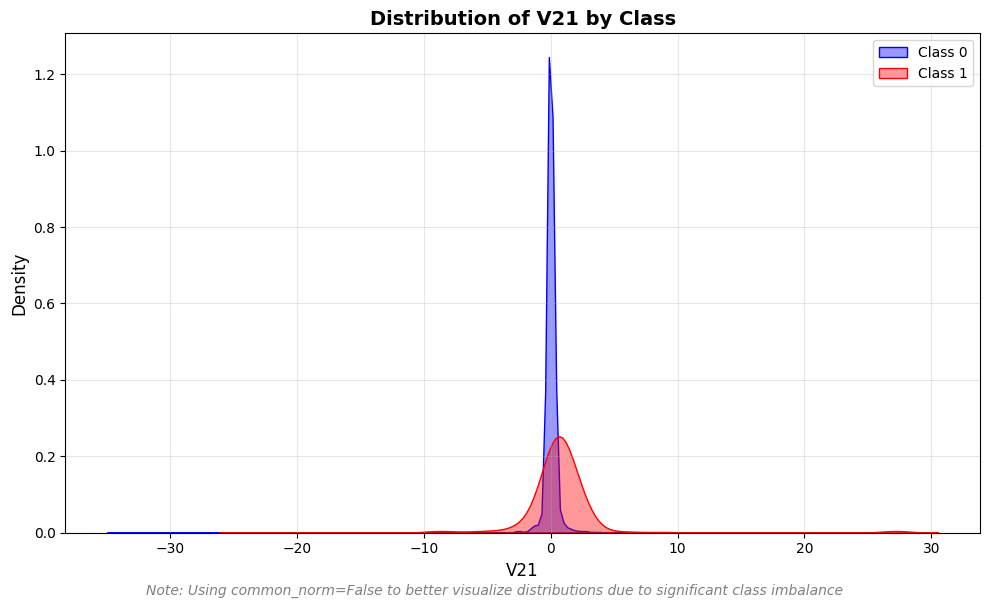

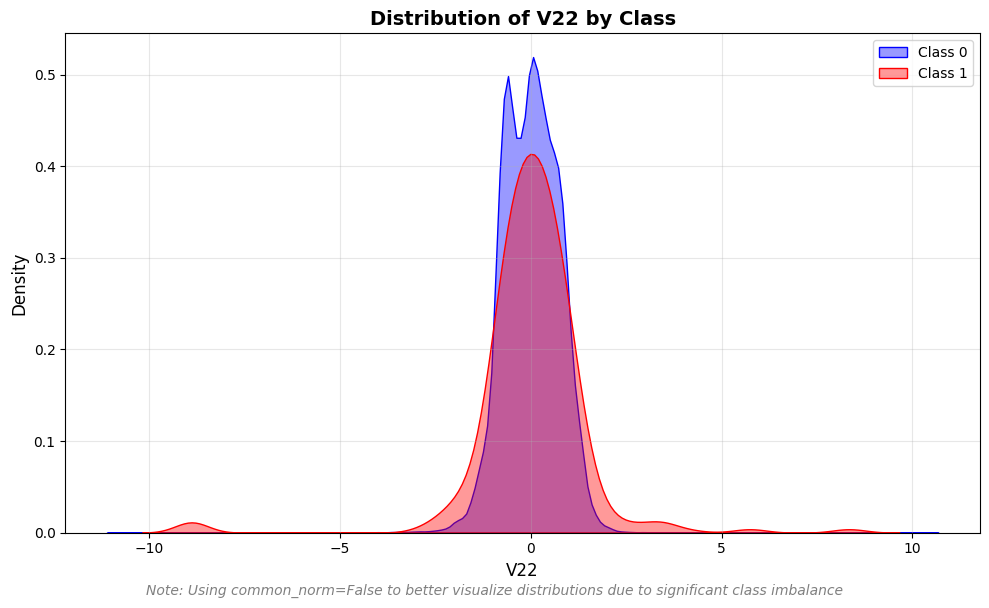

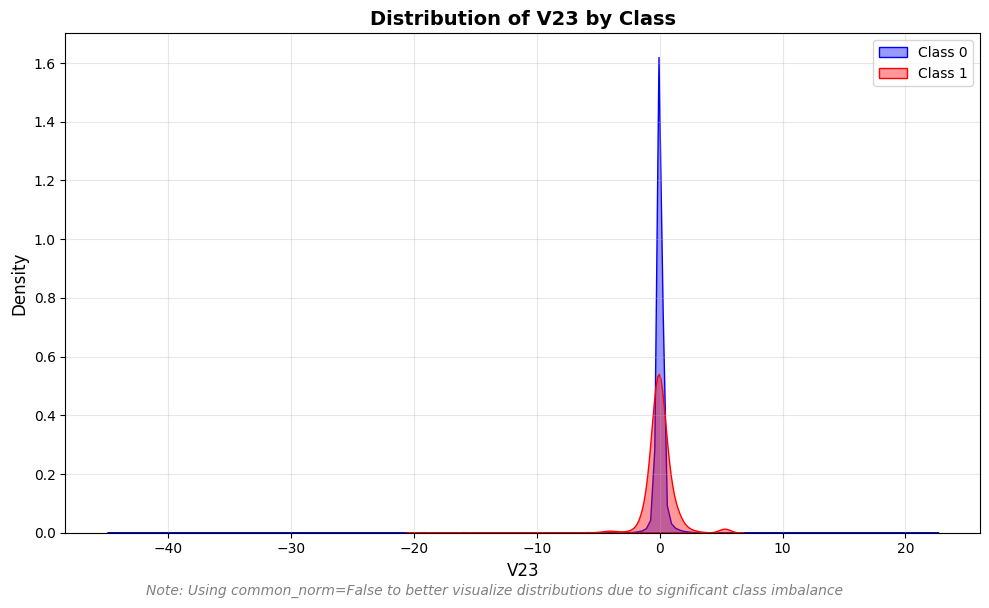

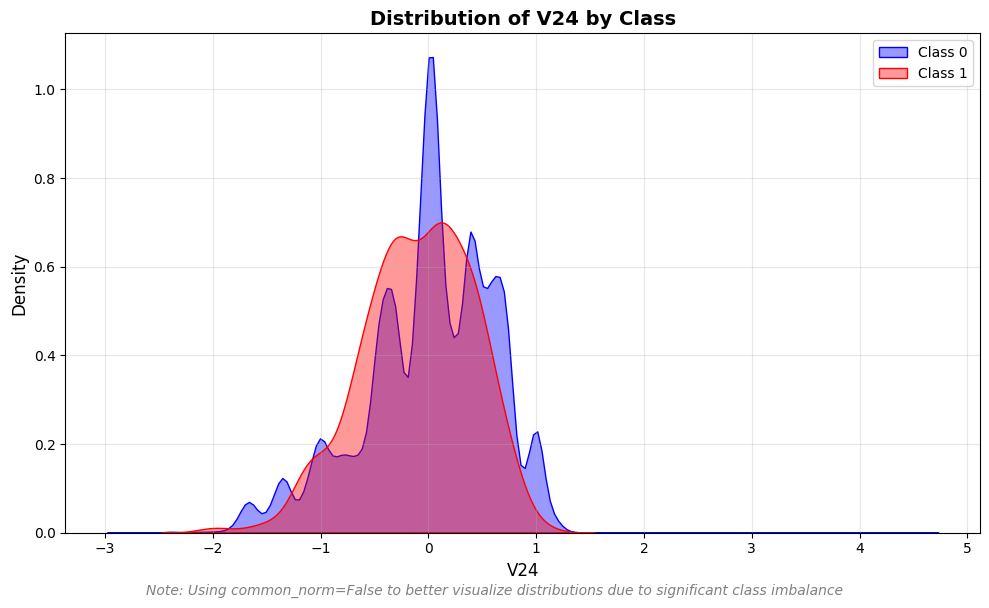

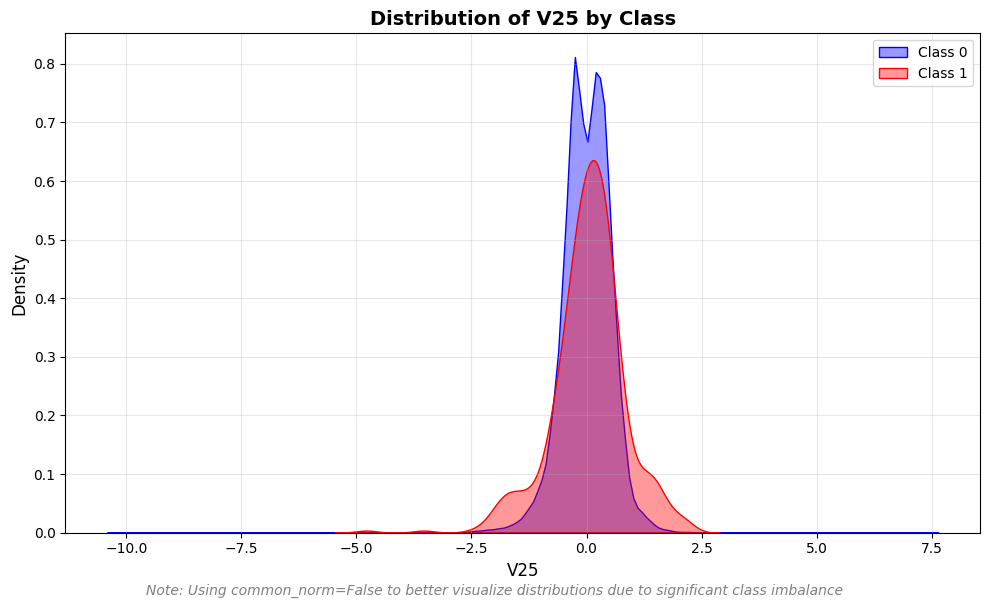

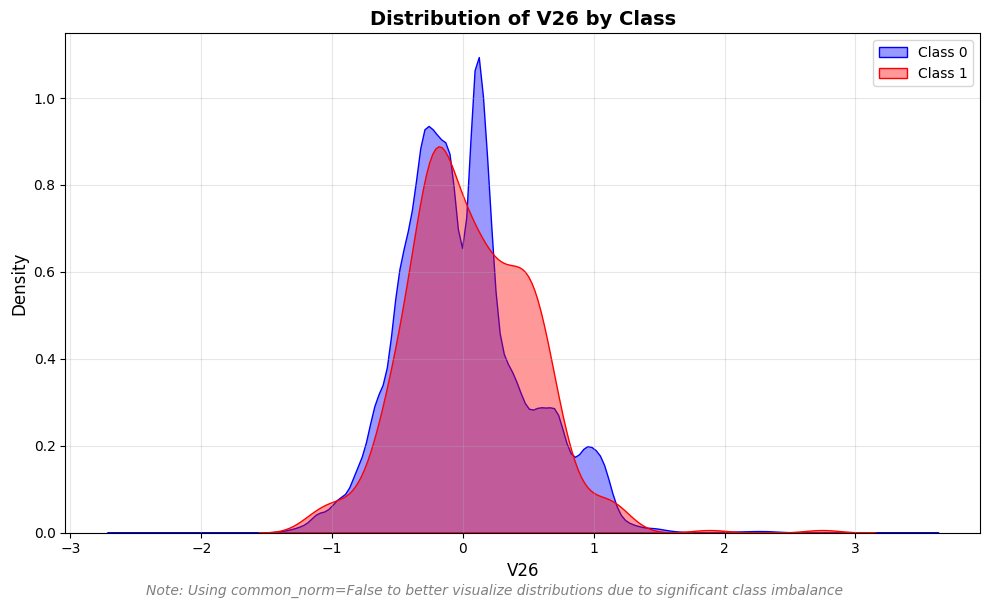

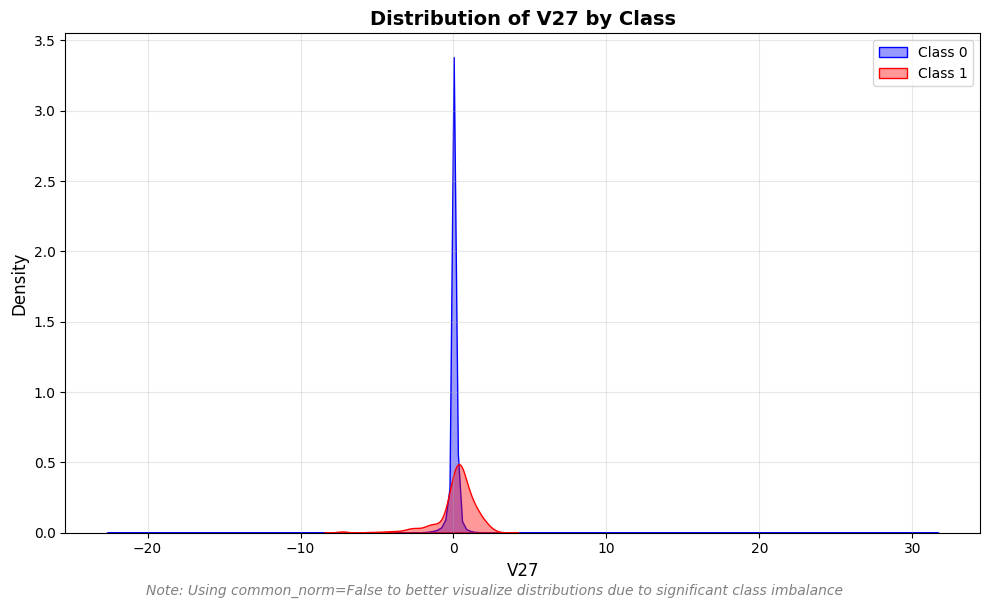

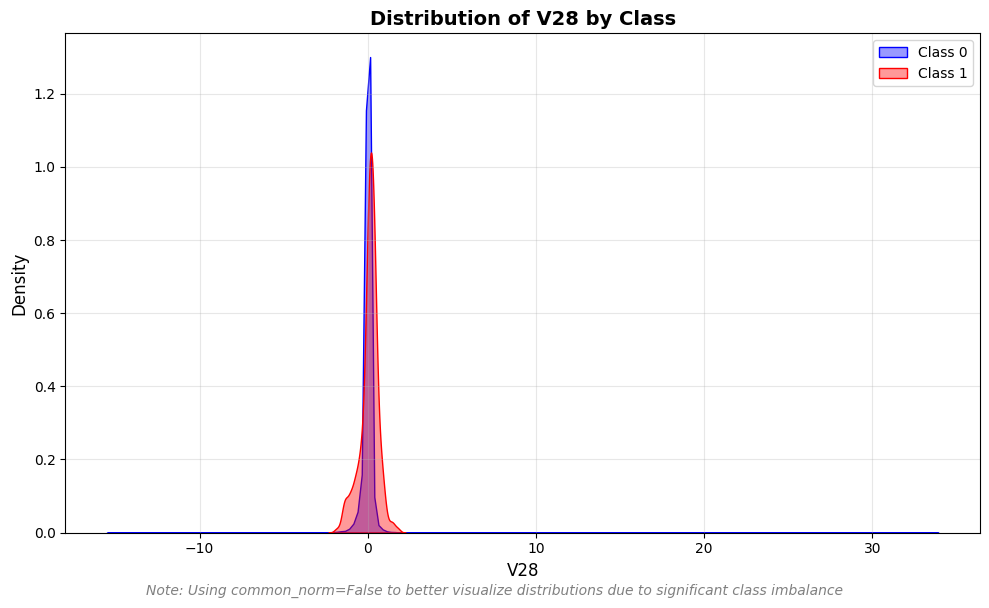

In [ ]:
for column in df.columns:
    if column.startswith("V") and column != "Class":
        plot_distribution(column)

### Amount


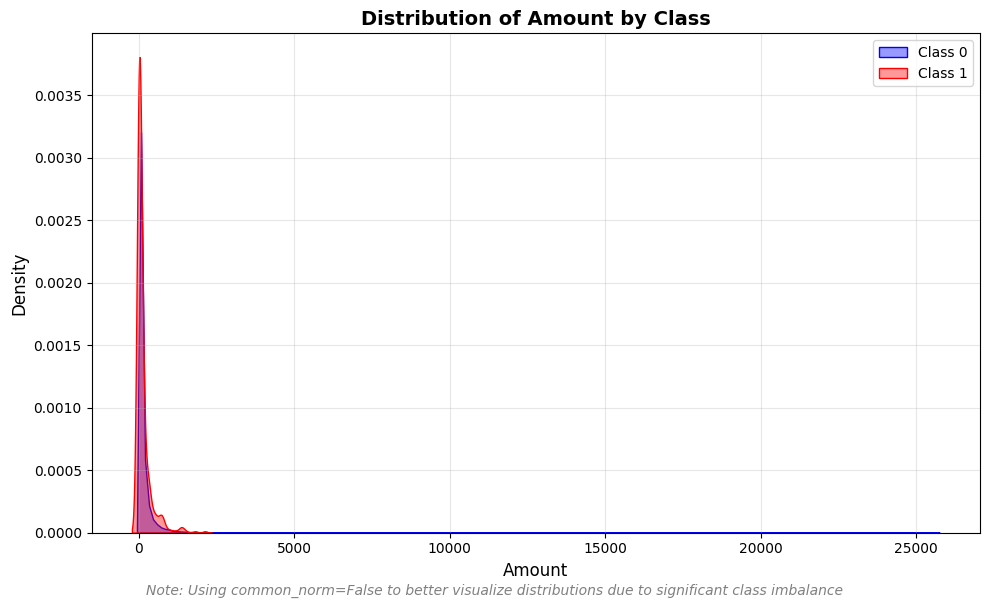

In [ ]:
plot_distribution("Amount")

## Multivariate


<Axes: >

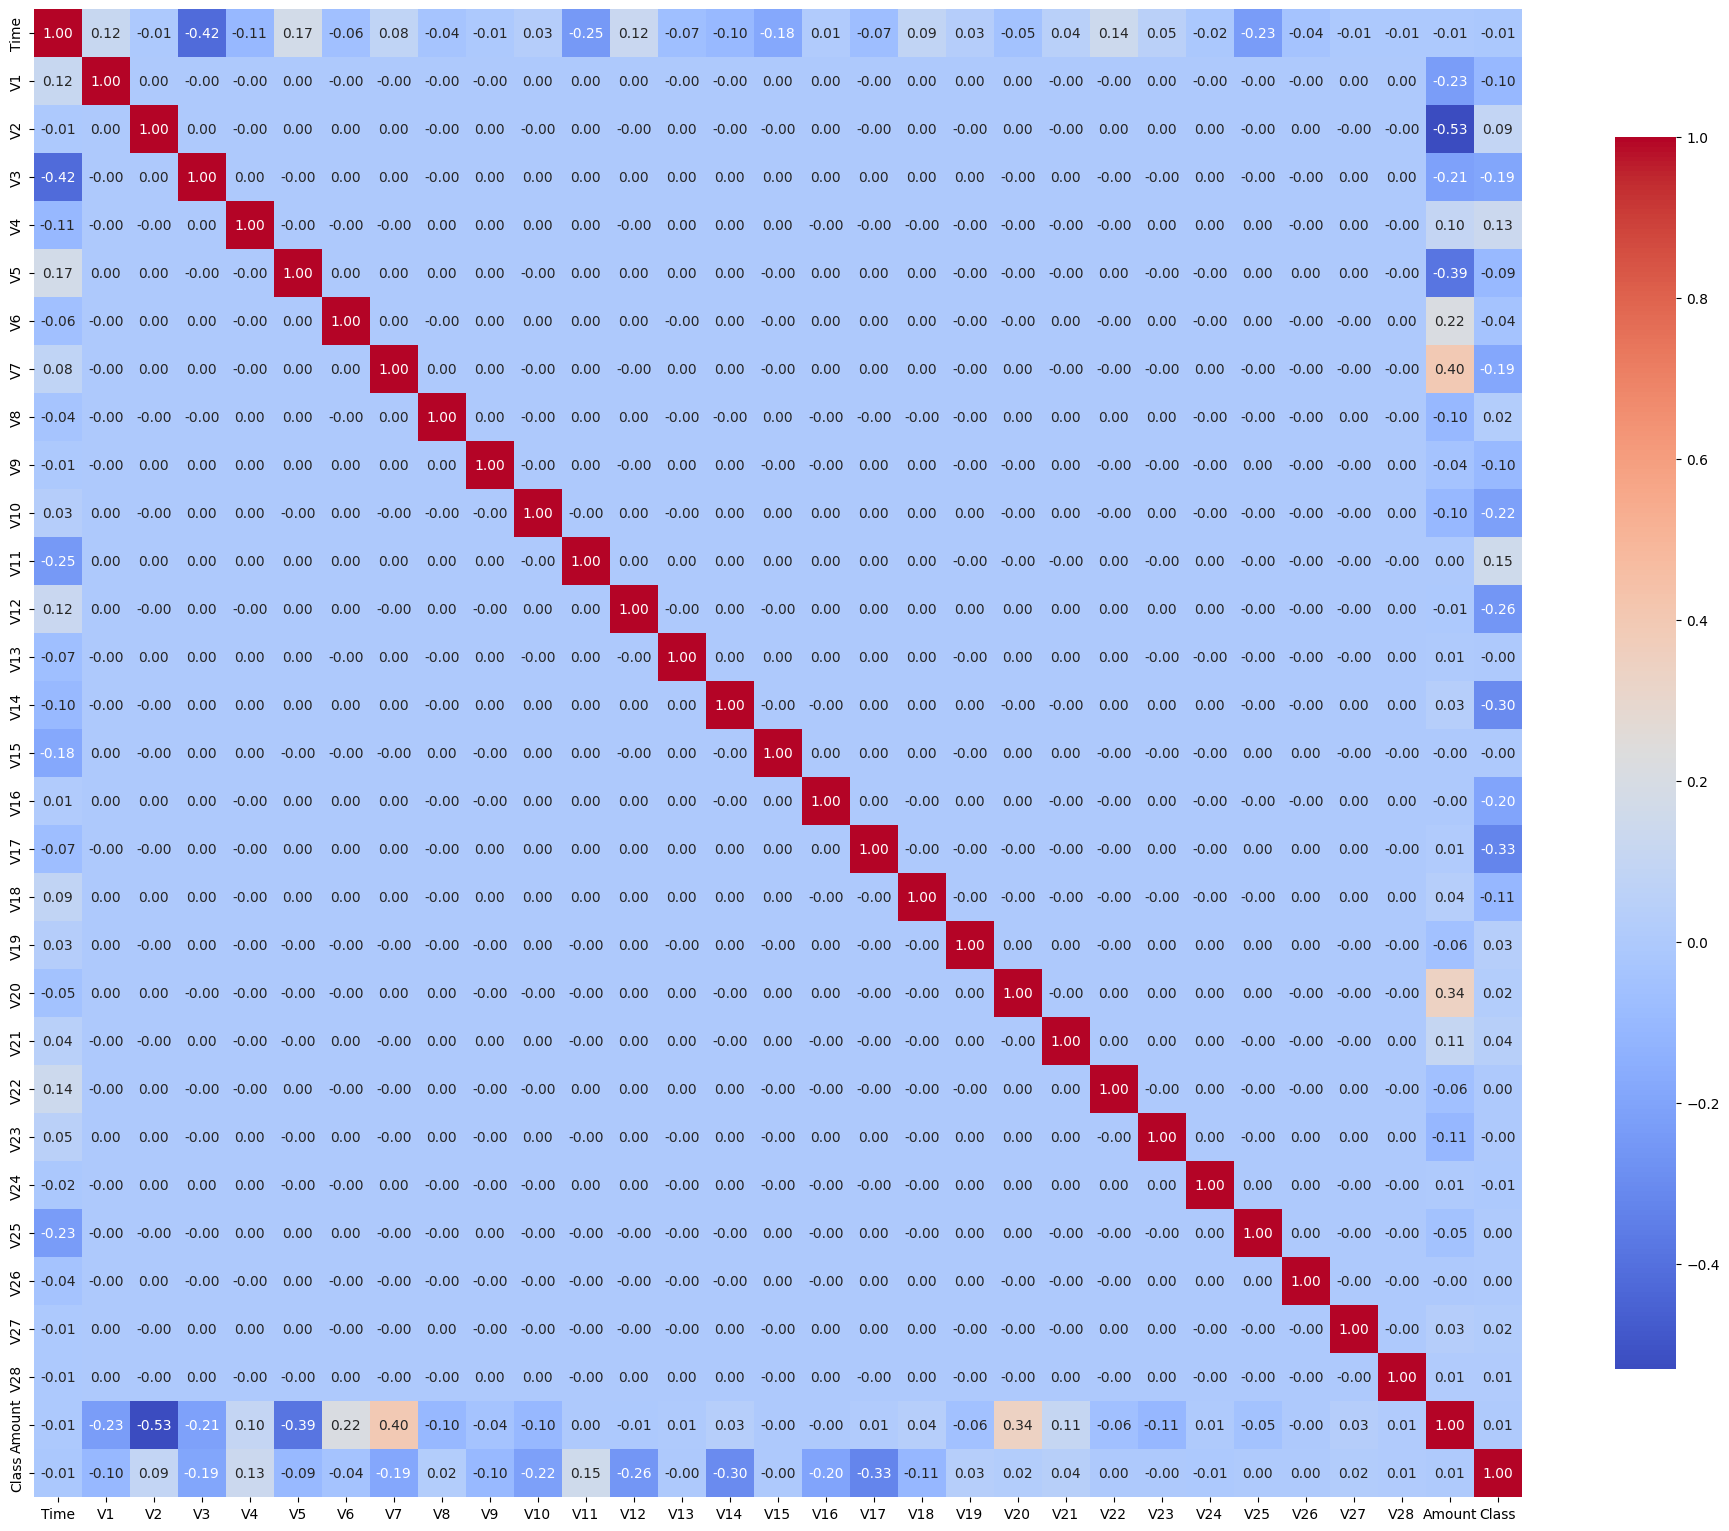

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(
    df_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)

# Preprocessing


In [ ]:
df.drop_duplicates(inplace=True)

## Scaler


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method="yeo-johnson")

# Kolom-kolom yang akan ditransformasikan dengan log
log_transform_cols = [
    "V1",
    "V2",
    "V3",
    "V4",
    "V5",
    "V6",
    "V7",
    "V8",
    "V11",
    "V12",
    "V14",
    "V15",
    "V17",
    "V18",
    "V20",
    "V21",
    "V23",
    "V24",
    "V25",
    "V27",
    "V28",
    "Amount",
]

# Terapkan log transformation, gunakan np.log1p untuk menghindari log(0)
df[log_transform_cols] = pt.fit_transform(df[log_transform_cols])
# Kolom yang akan distandarisasi
standardize_cols = ["Time", "V9", "V10", "V13", "V16", "V19", "V22", "V26"]
scaler = StandardScaler()
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print("-" * 100)
print(f"Training set class distribution:")
print(y_train.value_counts())
print(f"Testing set class distribution:")
print(y_test.value_counts())

Training set size: 226980
Testing set size: 56746
----------------------------------------------------------------------------------------------------
Training set class distribution:
0    226602
1       378
Name: Class, dtype: int64
Testing set class distribution:
0    56651
1       95
Name: Class, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Original class distribution:")
print(y_train.value_counts())
print(f"Minimum class size: {y_train.value_counts().min()}")

# Apply SMOTE with adjusted k_neighbors if needed
min_class_size = y_train.value_counts().min()
k_neighbors = min(5, min_class_size - 1) if min_class_size > 1 else 1

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nOriginal training set size: {X_train.shape[0]}")
print(f"Balanced training set size: {X_train_balanced.shape[0]}")
print("-" * 100)
print(f"Balanced training set class distribution:")
print(pd.Series(y_train_balanced).value_counts())

Original class distribution:
0    226602
1       378
Name: Class, dtype: int64
Minimum class size: 378

Original training set size: 226980
Balanced training set size: 453204
----------------------------------------------------------------------------------------------------
Balanced training set class distribution:
0    226602
1    226602
Name: Class, dtype: int64


# Modeling


## NearestCentroid


In [ ]:
from sklearn.neighbors import NearestCentroid

# Inisialisasi dan latih model NearestCentroid
# Inisialisasi dan latih model NearestCentroid pada data hasil SMOTE (balanced)
nc_model = NearestCentroid()
nc_model.fit(X_train_balanced, y_train_balanced)

# Prediksi
y_pred_nc = nc_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# NearestCentroid - Train
y_train_pred_nc = nc_model.predict(X_train_balanced)
print("NearestCentroid - Train Metrics:")
print(f"Accuracy:  {accuracy_score(y_train_balanced, y_train_pred_nc):.4f}")
print(f"Precision: {precision_score(y_train_balanced, y_train_pred_nc):.4f}")
print(f"Recall:    {recall_score(y_train_balanced, y_train_pred_nc):.4f}")
print(f"F1 Score:  {f1_score(y_train_balanced, y_train_pred_nc):.4f}\n")

# NearestCentroid - Test
print("NearestCentroid - Test Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_nc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nc):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_nc):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_nc):.4f}\n")

NearestCentroid - Train Metrics:
Accuracy:  0.8866
Precision: 0.9997
Recall:    0.7734
F1 Score:  0.8721

NearestCentroid - Test Metrics:
Accuracy:  0.9994
Precision: 0.8961
Recall:    0.7263
F1 Score:  0.8023



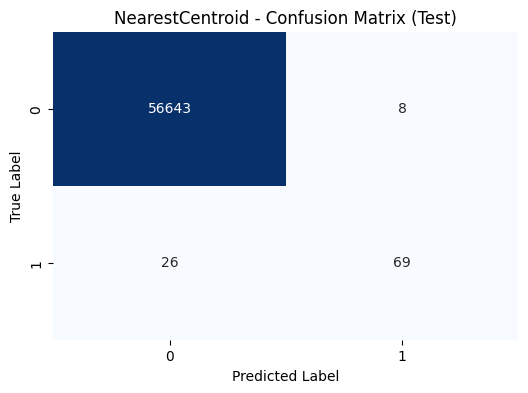

In [ ]:
cm = confusion_matrix(y_test, y_pred_nc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NearestCentroid - Confusion Matrix (Test)")
plt.show()

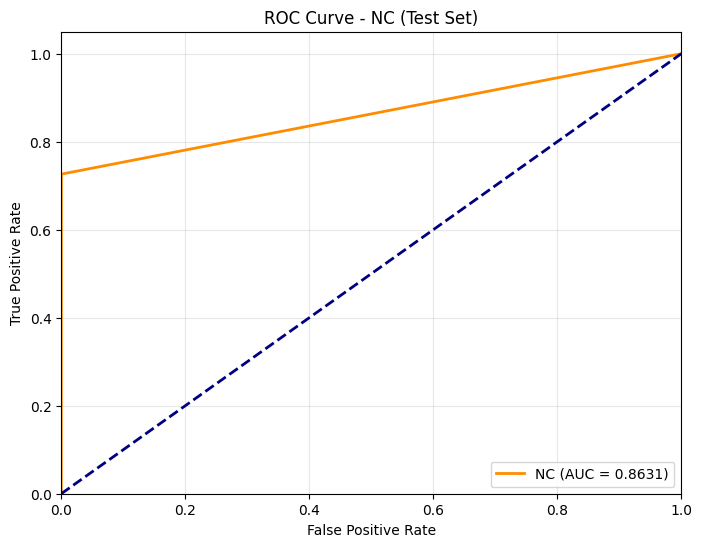

In [ ]:
from sklearn.metrics import roc_curve, auc

# Use decision_function as a proxy for probability
y_test_score_nc = nc_model.predict(X_test)

# Compute ROC curve and AUC
fpr_nc, tpr_nc, thresholds_nc = roc_curve(y_test, y_test_score_nc)
roc_auc_nc = auc(fpr_nc, tpr_nc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nc, tpr_nc, color="darkorange", lw=2, label=f"NC (AUC = {roc_auc_nc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - NC (Test Set)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## MLP


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

# Set random state
random_state = 42
np.random.seed(random_state)
torch.manual_seed(random_state)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_state)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Konversi data ke tensor dan pindahkan ke device
X_train_tensor = torch.tensor(X_train_balanced.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_balanced.values, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)


# Definisikan arsitektur MLP dengan kompleksitas lebih tinggi (lebih banyak layer dan neuron)
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu = nn.ReLU()
        self.out = nn.Linear(32, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.out(x)


input_dim = X_train_tensor.shape[1]
mlp = MLP(input_dim).to(device)
criterion = nn.CrossEntropyLoss()

# AdamW optimizer (modern optimizer) + L2 regularization (weight_decay)
optimizer = optim.AdamW(mlp.parameters(), lr=0.01)

# Learning rate scheduler: CosineAnnealingWarmRestarts
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2)

# Early stopping parameters
patience = 5
best_val_loss = np.inf
epochs_no_improve = 0
n_epochs = 100
overfit_epochs = 0
best_model_state = None

for epoch in range(n_epochs):
    mlp.train()
    optimizer.zero_grad()
    outputs = mlp(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    scheduler.step(epoch + 1)

    # Validation
    mlp.eval()
    with torch.no_grad():
        val_outputs = mlp(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()

    print(
        f"Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}"
    )

# Load best model
if best_model_state is not None:
    mlp.load_state_dict(best_model_state)
else:
    print("Warning: Tidak ada model dengan val_loss < train_loss yang ditemukan.")

# Evaluasi
mlp.eval()
with torch.no_grad():
    y_pred_mlp = mlp(X_test_tensor)
    y_pred_mlp_class = torch.argmax(y_pred_mlp, dim=1).cpu().numpy()

Using device: cuda
Epoch 1/100, Train Loss: 0.6204, Val Loss: 0.8018
Epoch 2/100, Train Loss: 0.5122, Val Loss: 0.7608
Epoch 3/100, Train Loss: 0.4635, Val Loss: 0.7240
Epoch 4/100, Train Loss: 0.4367, Val Loss: 0.7027
Epoch 5/100, Train Loss: 0.4238, Val Loss: 0.6964
Epoch 6/100, Train Loss: 0.4203, Val Loss: 0.6299
Epoch 7/100, Train Loss: 0.3858, Val Loss: 0.5682
Epoch 8/100, Train Loss: 0.3558, Val Loss: 0.5145
Epoch 9/100, Train Loss: 0.3309, Val Loss: 0.4704
Epoch 10/100, Train Loss: 0.3110, Val Loss: 0.4365
Epoch 11/100, Train Loss: 0.2958, Val Loss: 0.4120
Epoch 12/100, Train Loss: 0.2848, Val Loss: 0.3960
Epoch 13/100, Train Loss: 0.2775, Val Loss: 0.3868
Epoch 14/100, Train Loss: 0.2732, Val Loss: 0.3827
Epoch 15/100, Train Loss: 0.2712, Val Loss: 0.3817
Epoch 16/100, Train Loss: 0.2707, Val Loss: 0.3415
Epoch 17/100, Train Loss: 0.2507, Val Loss: 0.3052
Epoch 18/100, Train Loss: 0.2324, Val Loss: 0.2733
Epoch 19/100, Train Loss: 0.2162, Val Loss: 0.2459
Epoch 20/100, Train L

In [ ]:
# MLP - Train
mlp.eval()
with torch.no_grad():
    y_train_pred_mlp = mlp(X_train_tensor)
    y_train_pred_mlp_class = torch.argmax(y_train_pred_mlp, dim=1).cpu().numpy()

print("MLP - Train Metrics:")
print(f"Accuracy:  {accuracy_score(y_train_balanced, y_train_pred_mlp_class):.4f}")
print(f"Precision: {precision_score(y_train_balanced, y_train_pred_mlp_class):.4f}")
print(f"Recall:    {recall_score(y_train_balanced, y_train_pred_mlp_class):.4f}")
print(f"F1 Score:  {f1_score(y_train_balanced, y_train_pred_mlp_class):.4f}\n")

# MLP - Test
print("MLP - Test Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_mlp_class):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp_class):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_mlp_class):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_mlp_class):.4f}")

MLP - Train Metrics:
Accuracy:  0.9796
Precision: 0.9858
Recall:    0.9732
F1 Score:  0.9795

MLP - Test Metrics:
Accuracy:  0.9862
Precision: 0.0965
Recall:    0.8632
F1 Score:  0.1735


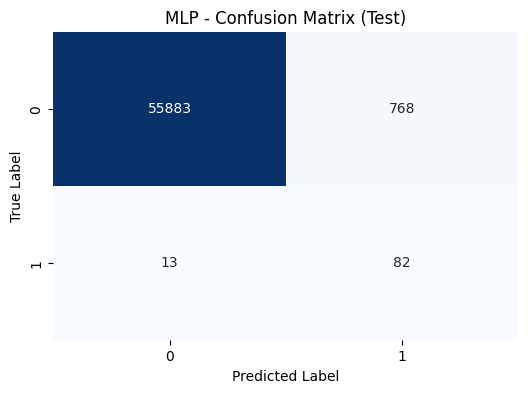

In [ ]:
cm = confusion_matrix(y_test, y_pred_mlp_class)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("MLP - Confusion Matrix (Test)")
plt.show()

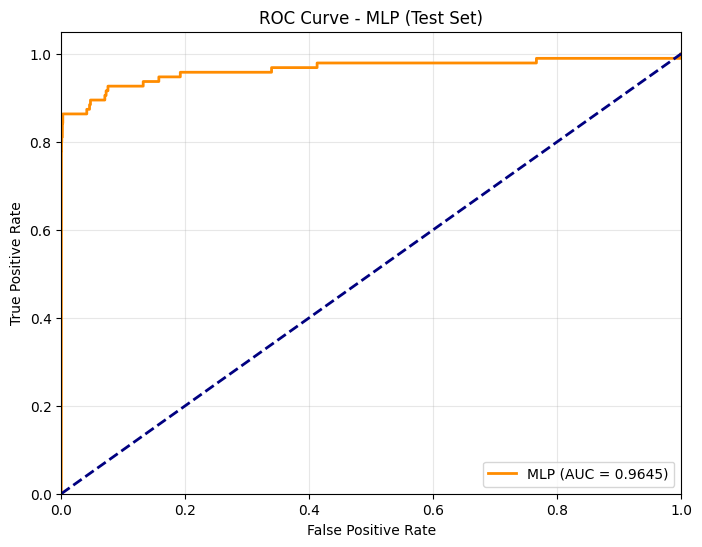

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Probabilitas prediksi kelas 1 dari model MLP
mlp.eval()
with torch.no_grad():
    y_test_proba = torch.softmax(mlp(X_test_tensor), dim=1)[:, 1].cpu().numpy()

# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"MLP (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP (Test Set)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

**Latar Belakang**

Di era digital, transaksi keuangan elektronik berkembang pesat melalui perbankan, e-commerce, dan layanan digital lainnya. Kemudahan ini membawa manfaat besar, namun juga meningkatkan risiko penipuan (**fraud**) yang semakin canggih. Fraud dapat menyebabkan kerugian finansial signifikan bagi institusi maupun pelanggan.

Salah satu tantangan utama dalam deteksi fraud adalah **ketidakseimbangan data** (class imbalance), di mana jumlah transaksi normal jauh lebih banyak dibandingkan transaksi fraud. Hal ini membuat model cenderung bias ke kelas mayoritas dan mengabaikan kelas minoritas. Oleh karena itu, diperlukan pendekatan dan algoritma yang mampu mengatasi masalah ini agar deteksi fraud menjadi optimal.

Berbagai metode machine learning telah digunakan, mulai dari model sederhana seperti **NearestCentroid** hingga model kompleks seperti **Multi-Layer Perceptron (MLP)**. Setiap model memiliki kelebihan dan kekurangan, terutama dalam **trade-off antara recall dan precision**. Recall tinggi penting untuk mendeteksi sebanyak mungkin kasus fraud, sedangkan precision tinggi diperlukan agar tidak terlalu banyak transaksi normal yang salah terdeteksi sebagai fraud.

---

# **Kesimpulan Model MLP untuk Fraud Detection**

Model **MLP** yang dikembangkan dan dilatih pada dataset deteksi fraud menunjukkan performa sangat baik pada data pelatihan (train), dengan skor **akurasi, presisi, recall, dan F1 score** yang tinggi. Namun, pada data pengujian (test), meskipun akurasi tetap tinggi (**0.9862**), terjadi penurunan signifikan pada **precision** dan **F1 score**, sementara **recall** tetap konsisten tinggi (**0.8632**).

Pada konteks deteksi fraud, **recall adalah metrik paling krusial**. Recall mengukur seberapa banyak transaksi fraud yang berhasil diidentifikasi dari seluruh kasus fraud yang sebenarnya terjadi. Dalam praktik, **lebih baik mendeteksi sebanyak mungkin fraud (true positive)** meskipun konsekuensinya adalah meningkatnya false positive. Kerugian akibat fraud yang tidak terdeteksi (**false negative**) biasanya jauh lebih besar dibandingkan ketidaknyamanan akibat salah deteksi (**false positive**).

Dengan **recall 0.8632** pada data test, model MLP mampu mendeteksi sebagian besar transaksi fraud. Namun, **precision yang rendah (0.0965)** menunjukkan masih banyak transaksi yang diprediksi fraud padahal sebenarnya bukan. Kondisi ini umum terjadi pada kasus dengan data sangat imbalanced.

**Model MLP sangat cocok digunakan sebagai sistem deteksi awal (early warning system)**. Model dapat menandai transaksi mencurigakan untuk kemudian diverifikasi manual atau melalui sistem tambahan yang lebih spesifik. Pendekatan ini membantu perusahaan meminimalisir kerugian fraud tanpa membebani proses bisnis dengan terlalu banyak false positive.

---

### **Tabel Perbandingan Skor Model**

| Model           | Dataset | Accuracy | Precision | Recall | F1 Score |
| --------------- | ------- | -------- | --------- | ------ | -------- |
| NearestCentroid | Train   | 0.8866   | 0.9997    | 0.7734 | 0.8721   |
| NearestCentroid | Test    | 0.9994   | 0.8961    | 0.7263 | 0.8023   |
| MLP             | Train   | 0.9796   | 0.9858    | 0.9732 | 0.9795   |
| MLP             | Test    | 0.9862   | 0.0965    | 0.8632 | 0.1735   |

**Catatan:**

- Nilai pada tabel menunjukkan performa masing-masing model pada data train dan test.
- NearestCentroid unggul pada precision dan accuracy di data test, sedangkan MLP unggul pada recall (kemampuan mendeteksi fraud lebih banyak).

---

### **Analisis ROC Curve dan AUC**

ROC Curve (**Receiver Operating Characteristic Curve**) adalah grafik yang menggambarkan kemampuan model dalam membedakan antara kelas positif (fraud) dan negatif (bukan fraud) pada berbagai threshold. Sumbu X menunjukkan **False Positive Rate (FPR)**, sedangkan sumbu Y menunjukkan **True Positive Rate (TPR)** atau **Recall**.

- **Semakin mendekati sudut kiri atas**, semakin baik performa model dalam mendeteksi fraud tanpa banyak false positive.
- **AUC (Area Under Curve)** adalah nilai luas di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1:
  - **AUC = 1**: Model sempurna membedakan kelas.
  - **AUC = 0.5**: Model tidak lebih baik dari tebak acak.
  - **AUC mendekati 1**: Semakin tinggi, semakin baik performa model.

Pada hasil di atas:

- **MLP** memiliki AUC **0.9645**, menunjukkan kemampuan sangat baik dalam membedakan transaksi fraud dan non-fraud.
- **NearestCentroid** memiliki AUC **0.8631**, juga cukup baik namun masih di bawah performa MLP.

**Kesimpulan:**  
AUC yang tinggi pada model MLP menegaskan bahwa model ini sangat efektif sebagai sistem deteksi awal, karena mampu menangkap sebagian besar kasus fraud dengan tingkat kesalahan yang rendah.

---

### **Analisis Perbandingan Model**

- **NearestCentroid**:

  - **Akurasi dan precision sangat tinggi** pada data test (**precision: 0.8961**).
  - **Recall lebih rendah** (**0.7263**) dibandingkan MLP.
  - Artinya, model ini jarang salah menandai transaksi normal sebagai fraud (false positive rendah), namun lebih banyak fraud yang lolos deteksi (false negative lebih tinggi).

- **MLP**:
  - **Recall lebih tinggi** (**0.8632**), sehingga mampu menangkap lebih banyak kasus fraud.
  - **Precision lebih rendah**, sehingga lebih banyak transaksi normal yang terdeteksi sebagai fraud.
  - Dalam deteksi fraud, **recall tinggi lebih diutamakan** untuk meminimalisir kerugian akibat fraud yang tidak terdeteksi.

**Kesimpulan Perbandingan:**

- Jika prioritas utama adalah **menangkap sebanyak mungkin kasus fraud (recall tinggi)**, maka **MLP lebih unggul** dan cocok sebagai sistem deteksi awal.
- Jika prioritas utama adalah **meminimalisir false positive (precision tinggi)**, maka **NearestCentroid lebih baik**, namun risiko fraud yang lolos deteksi lebih besar.
- Idealnya, kedua model dapat dikombinasikan atau digunakan secara berjenjang: **MLP sebagai filter awal (high recall), lalu hasilnya diverifikasi lebih lanjut dengan model/sistem lain yang lebih ketat (high precision)**.

---

### **Rekomendasi dan Implikasi Bisnis**

- **Fokus pada Recall:** Recall tinggi sangat penting untuk memastikan sebanyak mungkin kasus fraud dapat dicegah sejak dini.
- **Verifikasi Lanjutan:** Transaksi yang terdeteksi fraud oleh model sebaiknya tidak langsung diblokir, melainkan melalui proses verifikasi tambahan (manual atau sistem pendukung).
- **Pengembangan Model Lanjutan:** Precision rendah dapat diatasi dengan model ensemble, threshold tuning, atau penambahan fitur baru yang lebih informatif.
- **Monitoring dan Evaluasi Berkala:** Model perlu dievaluasi secara berkala untuk memastikan performa tetap optimal seiring perubahan pola transaksi dan modus fraud.

---

## **Kesimpulan Utama**

Model **MLP** terbukti **efektif dalam mendeteksi fraud** berkat nilai recall dan AUC yang tinggi, sehingga mampu menangkap sebagian besar kasus fraud yang terjadi. **Fokus pada recall** sangat penting dalam sistem deteksi fraud untuk meminimalisir kerugian akibat transaksi fraud yang lolos deteksi. Model ini sangat direkomendasikan sebagai **sistem deteksi awal**, yang dapat diintegrasikan dengan proses verifikasi lanjutan guna menjaga keseimbangan antara keamanan dan kenyamanan pelanggan.
